# **Titanic**: Persiguiendo el confort, ¿nos podremos permitir sobrevivir?

In [174]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

### Vamos a empezar por importar y explorar el DataSet

In [175]:
# Importamos el csv
df = pd.read_csv(os.getcwd() + '/Data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
# Vemos el tipo de datos, los nombres de las columnas y donde hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Identificar y corregir (o no) valores nulos

#### Columna `Cabin` en relacion con la columna `Fare`:

Veo que la mayoria de valores son nulos. En este caso rellenar con otros valores no tiene sentido ya que aunque nos informan de donde estaban alojados, no conocemos las habitaciones totales o su distribución por lo que no podremos hacer una asignacion aproximada basada en clase. 

Aun así, podemos comprobar que la mayoria de personas que no tienen asignada `Cabin` son de clases 2 y 3 por lo que podemos pensar que estas personas no tenian habitacion privada asignada o en otras ocasiones la informacion sobre su asignacion se perdio. Igualmente, para rellenar esta columna con datos con sentido tendriamos que utilizar un modelo predictivo pero no lo haremos en esta ocasión. [Wikipedia.FirstClass.Location](https://en.wikipedia.org/wiki/First-class_facilities_of_the_Titanic)

In [177]:
df[df['Cabin'].isnull()].value_counts('Pclass')

Pclass
3    479
2    168
1     40
Name: count, dtype: int64

Tambien, segun la informacion sobre la distribucion de las cabinas podemos ver que las cabinas A,B y C forman parte de lo que se considera primera clase. El precio minimo de una habitacion privada sería de 30 GBP segun [Wikipedia.SecondClass.Accommodation](https://en.wikipedia.org/wiki/Second-_and_third-class_facilities_on_the_Titanic)

Con este dataset en particular creo que el precio minimo de la habitacion privada estaba más cerca de los 25 GBP ya que asumo que ninguna persona que pagase por 1ª clase viajaría en habitaciones compartidas. Y wikipedia tambien indica que las habitaciones de clase 2 eran de hasta 4 personas. Entonces todas las habitaciones vendidas por un importe inferior a este limite podemos determinar que no tenian habitacion asignada en el barco de antemano. Esto es una especulación por lo que no toco la columna.

In [178]:
# Las 4 personas en 1 clase que considero nulos/errores/outliers ya que la mayoría tienen la cabina asignada
df[(df['Fare']<25) & (df['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S


#### Columna `Age`:

Me sorprende que la edad de los pasajeros `Age` se exprese en `float` pero reviso y veo que hay valores que efectivamete muestran decimales, no me parece que este nivel de precision tenga relevancia para nuestro caso en particular por lo que lo pasamos a `int`  de manera que la edad empiece en 0 y rellenamos los valores nulos.

In [179]:
for row in df['Age']:
    if (row - np.trunc(row))!= 0 and not np.isnan(row):
        print(row)

28.5
0.83
14.5
70.5
32.5
32.5
36.5
55.5
40.5
45.5
20.5
23.5
0.92
45.5
0.75
40.5
0.75
24.5
28.5
0.67
30.5
0.42
30.5
0.83
34.5


In [180]:
# decir que un bebe tiene una edad de 0.92 años es muy interesante
df[df['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [181]:
# Cambio el tipo de la columna a int asegurandome de que ahora todos los valores debajo del 0 son 0. 
df['Age'] = np.trunc(df['Age']).astype('Int64')

In [182]:
df[df['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0,1,1,29106,18.7500,NaN,S


Ahora rellenamos los valores nulos en `Age` con la moda.

In [183]:
media = round(df['Age'].mean())
moda = df['Age'].mode()[0]
media, moda

(30, 24)

In [184]:
# Rellenamos los valores nulos con la moda
df['Age'] = df['Age'].fillna(moda)

In [185]:
df['Age'].isnull().sum()

0

#### Columna `Embarked`:
Los dos valores nulos en embarque los asignamos a la moda ya que se refiere a el puerto en el que embarcaron y es una variable discreta. El groso de los pasajeros embarco en Southampton, de donde partió el barco, asique dos valores más no afectan a los datos.

In [186]:
df.value_counts('Embarked')

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [187]:
# Calculamos la moda, rellenamos los valores nulos, comprobamos que ya no hay nulos
moda = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(moda)
df['Embarked'].isnull().sum()

0

### Añado columnas utiles:

#### Trato la columna `Fare` para convertirla en precio por persona:

Me doy cuenta de que muchos tickets estan repetidos y que como consecuencia muchos de los datos lo estan tambien. Compruebo y corroboro que todos los tickets con numero comun llevan exactamente el mismo precio por lo que es un precio total. 

Antes de nada divido cada `Fare` con `Ticket` comun entre la cantidad de personas con ese ticket. Esto me será util para despues comentar sobre el gasto total por familia. 




In [188]:
duplicated = pd.DataFrame(df.groupby('Ticket').agg({
   'Name' : 'size',
   'Fare': lambda x: ' ,'.join(map(str,x)) 
   })).rename(columns={
      'Name' : 'PCount'
   })
duplicated

,PCount,Fare
Ticket,,
110152,3,"86.5 ,86.5 ,86.5"
110413,3,"79.65 ,79.65 ,79.65"
110465,2,"52.0 ,52.0"
110564,1,26.55
110813,1,75.25
...,...,...
W./C. 6608,4,"34.375 ,34.375 ,34.375 ,34.375"
W./C. 6609,1,7.55
W.E.P. 5734,1,61.175


In [189]:
# Por cada ticket 'unico' cada precio queda dividido entre la cantidad de veces que esta repetido
duplicated.reset_index(inplace=True)

for ticket in duplicated['Ticket']:
    Pcount = duplicated.loc[duplicated['Ticket'] == ticket, 'PCount'].values[0] 
    df.loc[df['Ticket'] == ticket, 'Fare'] = (df.loc[df['Ticket'] == ticket, 'Fare'])/Pcount


#### Creo la columna `FareRange`:

Reviso los precios minimos y maximos para crear el rango y recuerdo que el precio de una habitacion privada es de por encima de 25 GBP, como hemos hecho la division por persona y no por habitación el primer corte me parece relevante a los 15 GBP al consultar la distribución descubro que la mayoría de los datos estan entre el 0 y 100. Por este motivo los rangos que más relevancia tienen son 0-15, 15-30, 30-60, 60+.

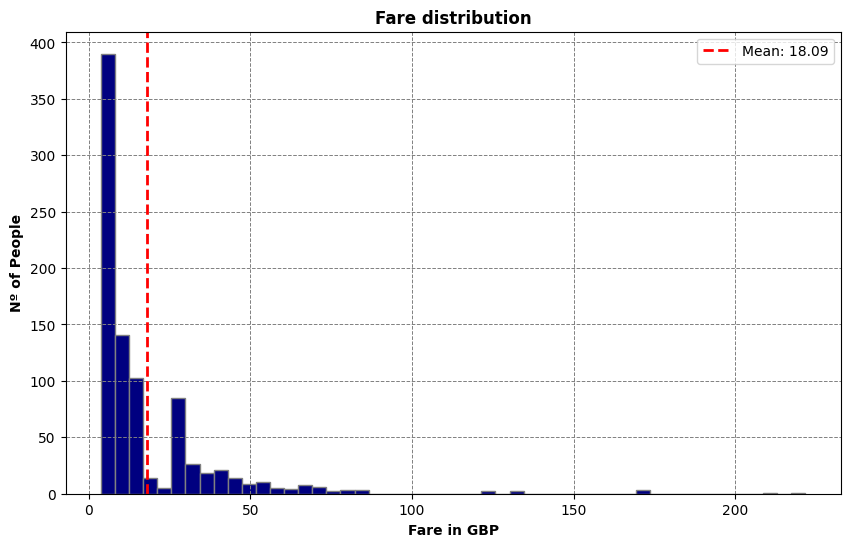

In [190]:
# Grafica con la distribucion de los precios
fare = df['Fare'].loc[df['Fare']!=0]
media_fare = fare.mean()

plt.figure(figsize=(10, 6))
plt.hist(fare, bins=50, color='navy', edgecolor='gray')

plt.title('Fare distribution', fontweight='bold', color='black')
plt.xlabel('Fare in GBP', fontweight='bold', color='black')
plt.ylabel('Nº of People', fontweight='bold', color='black')

plt.grid(True, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(media_fare, color='red', linestyle='--', linewidth=2, label=f'Mean: {media_fare:.2f}')
plt.legend()
plt.show()

In [191]:
# Encuentro esta funcion que me permite hacer lo mismo que digitalize pero dandole ya los nombre que yo quiero a los rangos
df['FareRange'] = pd.cut(df['Fare'], bins= [0,15,30,60,550], labels=['0-15 GBP', '15-30 GBP', '30-60 GBP', '+60 GBP'])


#### Creo la columna `CurrentFare`:

Asi podremos tener los precios ajustados a la inflación actual para poder cambiar nuestro punto de referencia y comentar sobre el poder adquisitivo de la epoca vs el actual.

En este caso he seleccionado los datos historicos del IPC del gobierno de Inglaterra a través de su pagina oficial de datos [ons.gov.uk](https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/cdko/mm23).

Para este calculo solo necesitamos tomar el dato más reciente que en este caso es 2023, ya que aun no ha acabado el año 2024, y el dato que corresponde a 1912, el año en el que navegó el Titanic.  

In [192]:
# Leo el archivo del IPC uk
price_index = pd.read_csv(os.getcwd() + '/Data/Retail_Price_Index.csv')
price_index.head(10)

,Title,Retail Prices Index: Long run series: 1800 to 2024: Jan 1974=100
0,CDID,CDKO
1,Source dataset ID,MM23
2,PreUnit,NaN
3,Unit,"Index, base year = 100"
4,Release date,18-09-2024
5,Next release,16 October 2024
6,Important notes,NaN
7,1800,13.5
8,1801,15.1
9,1802,11.6


In [193]:
# Creo el indice con la columna title para poder buscar más facilmente por ella
price_index.set_index('Title', inplace=True)

In [194]:
# Le cambio el nombre a la unica columna para mayor facilidad
name = price_index.columns[0]
name

'Retail Prices Index: Long run series: 1800 to 2024: Jan 1974=100'

In [195]:
price_index.rename(columns= {name:'RPIndex'}, inplace=True)

In [196]:
# Tomamos los indices necesarios para crear nuestra funcion
i23 = float(price_index['RPIndex'].loc['2023'])
i12 = float(price_index['RPIndex'].loc['1912'])
i23, i12

(1472.7, 9.9)

In [197]:
def fare_current(fare, curr, old):
    return  round(fare *(curr/old), 2)  

In [198]:
# Transformamos la columna Fare a día de hoy 
df['CurrentFare']= df['Fare'].apply(fare_current, curr=i23, old=i12)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange,CurrentFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0-15 GBP,1078.49
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,+60 GBP,10603.93
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0-15 GBP,1178.90
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,26.5500,C123,S,15-30 GBP,3949.51
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0-15 GBP,1197.50


#### Creo la columna `LastName`:

Creo esta columna para poder agrupar entre familias con el mismo Apellido. No es una forma infalible para encontrar familias pero por lo menos es infalible para las familias inglesas. Generalmente la mujer toma el apellido del hombre al igual que los hijos. En el respecto en el que una mujer viaje con su marido, sus hijos y su hermana, la hermana no seria considerada parte de la unidad familiar. Pero para poder tener como referencia el gasto de una familia en realizar este viaje es suficiente.


In [199]:
# Esta funcion toma cada nombre y lo divide en 3 partes
def name_split(row, what):
    pattern  = r"(?P<last_name>^[\w\-]+),\s(?P<title>[\w]+)\.\s(?P<first_names>.+)"
    matches = re.match(pattern, row)
    if matches:
        lastname = matches.group('last_name')
        title = matches.group('title')
        names = matches.group('first_names')
        if what == 'LastName':
            return lastname
        elif what == 'Title':
            return title
        elif what == 'Names':
            return names
        else:
            raise AttributeError
        


In [200]:
# Creo la columna
df['LastName'] = df['Name'].apply(lambda row: name_split(row, what='LastName'))
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange,CurrentFare,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0-15 GBP,1078.49,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,+60 GBP,10603.93,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0-15 GBP,1178.90,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,26.5500,C123,S,15-30 GBP,3949.51,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0-15 GBP,1197.50,Allen


### Seleccion de datos inútiles:

Mientras estaba explorando la información por primera vez me saltó a la vista que en la columna `Fares` haya valores = 0, eso me hace preguntarme si estos pasajeros tiene un numero de billete y/o cabina y de no ser asi serán tripulación, un polizón o simplemente datos faltantes?


In [201]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CurrentFare
count,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.551066,0.523008,0.381594,17.788989,2646.246566
std,257.353842,0.486592,0.836071,13.207013,1.102743,0.806057,21.218157,3156.361622
min,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.0,0.000000,0.000000,7.762500,1154.730000
50%,446.000000,0.000000,3.000000,24.0,0.000000,0.000000,8.850000,1316.500000
75%,668.500000,1.000000,3.000000,35.0,1.000000,0.000000,24.288200,3613.050000
max,891.000000,1.000000,3.000000,80.0,8.000000,6.000000,221.779200,32991.340000


In [202]:
# Selecciono todos los pasajeros que no tienen precio asignado
unpaid = df[df['Fare'] == 0]
unpaid.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange,CurrentFare,LastName
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0,NaN,S,NaN,0.0,Leonard
263,264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0.0,B94,S,NaN,0.0,Harrison
271,272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0.0,NaN,S,NaN,0.0,Tornquist
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,24,0,0,239853,0.0,NaN,S,NaN,0.0,Parkes
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0,NaN,S,NaN,0.0,Johnson


Por otro lado, me salta a la vista que todas las personas que tienen el billete LINE sean personas que no han pagado el billete, no tengan familiares abordo, no tengan cabina asingada y todos embarcasen en SouthHampton. Tras un poco de investigacion decubro informacion sobre el unico superviviente [Johan Vilhelm Henrik Törnqvist](https://www.encyclopedia-titanica.org/titanic-survivor/william-henry-tornquist.html) y confirmo mis sospechas de que los billetes LINE son de tripulacion de la empresa "White Star Line Ticket" que es le empresa responsable del Titanic. 


In [203]:
df[df['Ticket']=='LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange,CurrentFare,LastName
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0,NaN,S,NaN,0.0,Leonard
271,272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0.0,NaN,S,NaN,0.0,Tornquist
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0,NaN,S,NaN,0.0,Johnson
597,598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0.0,NaN,S,NaN,0.0,Johnson


Para poder decidir que datos limpiar(o si limpiar alguno), filtro todos los pasajeros que tienen cabina asignada y que tienen billete LINE. Si tienen cabina, potencialmente podremos rellenar los valores. 

Me parece que estas filas en las que la gran mayoria de info relevante no esta son esencialmente inutiles. Como los hombres en categoria Young Adult son la categoría más abundante y como estas filas representan menos del 1% de los datos decido eliminarlas.


In [204]:
# Seleccion para borrar
delete = unpaid.loc[(unpaid['Cabin'].isnull()) & (unpaid['Ticket'] != 'LINE')]
delete

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange,CurrentFare,LastName
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,24,0,0,239853,0.0,NaN,S,NaN,0.0,Parkes
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,24,0,0,239853,0.0,NaN,S,NaN,0.0,Cunningham
466,467,0,2,"Campbell, Mr. William",male,24,0,0,239853,0.0,NaN,S,NaN,0.0,Campbell
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,24,0,0,239854,0.0,NaN,S,NaN,0.0,Frost
633,634,0,1,"Parr, Mr. William Henry Marsh",male,24,0,0,112052,0.0,NaN,S,NaN,0.0,Parr
674,675,0,2,"Watson, Mr. Ennis Hastings",male,24,0,0,239856,0.0,NaN,S,NaN,0.0,Watson
732,733,0,2,"Knight, Mr. Robert J",male,24,0,0,239855,0.0,NaN,S,NaN,0.0,Knight
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38,0,0,19972,0.0,NaN,S,NaN,0.0,Reuchlin


In [205]:
# For fun y ya que he creado la columna LastName voy a ver si hay pasajeros con el mismo apellido aunque aparezca que estas personas viajan solas
apellidos = delete['LastName'].unique()
delete_fam = pd.DataFrame()


for ln in apellidos:
    
    full_name = delete.loc[delete['LastName'] == ln, 'Name'].values[0]
    
    if ln in df['LastName'].values:
        matches = df.loc[(df['Name'] != full_name) & (df['LastName'] == ln)]
        delete_fam = pd.concat([delete_fam, matches])
        
delete_fam
# Parece que no por lo que procedemos a borrar las filas


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange,CurrentFare,LastName


In [206]:
delete.shape[0]

8

In [207]:
# Delete
df.drop(index=delete.index, inplace=True)

Ahora con solo tres lineas con precio 0 y que no corresponden a tripulación en la columna Fare se podría hacer una comparacion de todos los precios de las cabinas similares y rellenar con la media. Como para el analisis actual no es imperativo, lo dejo planteado aqui para poder implementarlo en otro momento o aprenda bien a hacer un modelo. 

In [208]:
df[(df['Fare'] == 0) & (df['Ticket'] != 'LINE')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareRange,CurrentFare,LastName
263,264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0.0,B94,S,NaN,0.0,Harrison
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0,A36,S,NaN,0.0,Andrews
815,816,0,1,"Fry, Mr. Richard",male,24,0,0,112058,0.0,B102,S,NaN,0.0,Fry


### Analisis y graficas:

En este caso me concentrare en los datos economicos y de clase. Creo que van a pintar una imagen mas clara de la sociedad de la epoca en yuxtaposicion con la actual.

#### Pasajeros distribuidos por rango de precio

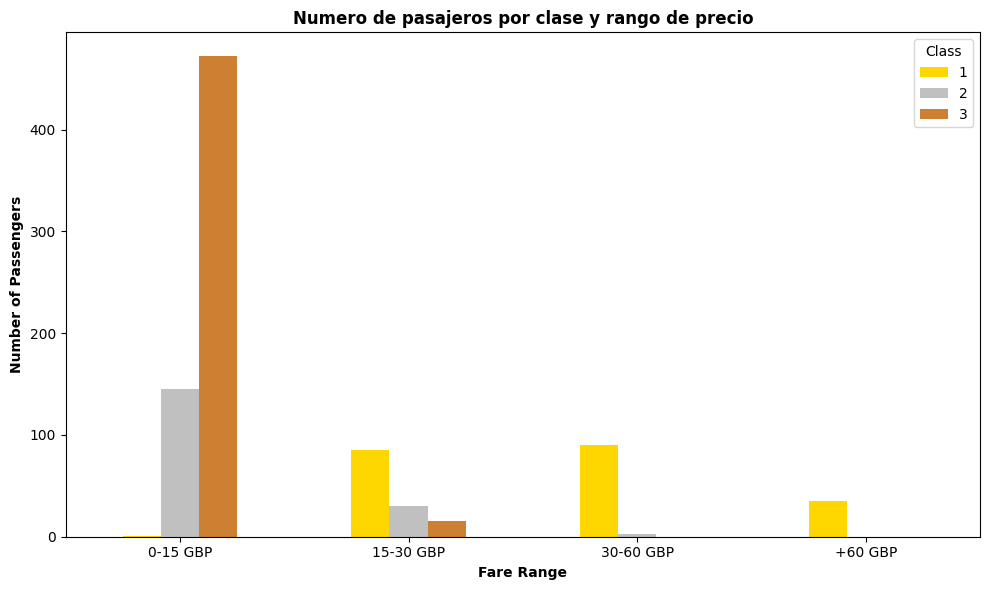

In [209]:
group = df.groupby(['FareRange', 'Pclass']).size().unstack(fill_value=0)
group.plot(kind='bar', figsize=(10,6), color=['#FFD700', '#C0C0C0', '#CD7F32'])

plt.title('Numero de pasajeros por clase y rango de precio', fontweight='bold')
plt.xlabel('Fare Range', fontweight='bold')
plt.ylabel('Number of Passengers', fontweight='bold')
plt.xticks(rotation=0)

plt.legend(title='Class')
plt.tight_layout()

plt.savefig(os.getcwd() + '/Recursos_visuales/Graficas/Fare_Class_Old.png', transparent=True, dpi=600)

plt.show()

Estos graficos ejemplifican como la distribucion de precios por clase es imprecisa y no representa el nivel adquisitivo

In [115]:
total1 = df[df['Pclass'] == 1].shape[0]
total2 = df[df['Pclass'] == 2].shape[0]
total3 = df[df['Pclass'] == 3].shape[0]

In [240]:
df['Fare'].loc[df['Pclass'] == 3].mean()

8.085856924643585

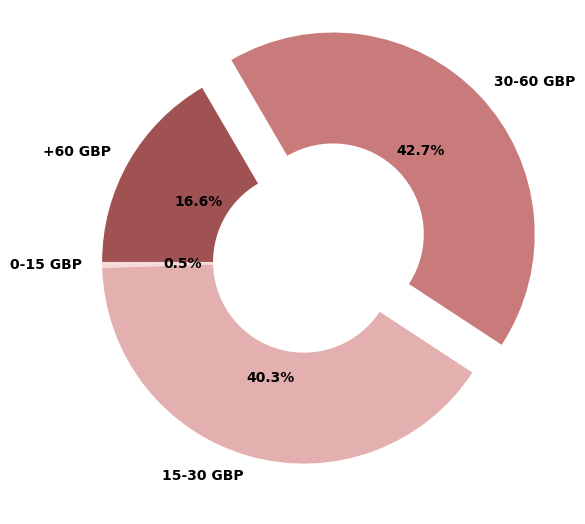

In [212]:
# Porcentaje por intervalo de precio para clase 1
Fdist_1 = ((df[df['Pclass'] == 1].value_counts('FareRange'))/total1*100).sort_index()

plt.figure(figsize=(6, 6))
plt.pie(Fdist_1, labels=Fdist_1.index, autopct='%1.1f%%', startangle=180, colors= ['#F6DADA', '#E4AFAF', '#C97A7A', '#A05252'],
        wedgeprops={'width': 0.55}, explode = [0, 0, 0.2, 0], textprops={'weight': 'bold'})
plt.tight_layout()
plt.savefig(os.getcwd() + '/Recursos_visuales/Graficas/Distribucion_Precios_1Clase.png', transparent=True, dpi=600, bbox_inches='tight')
plt.show()

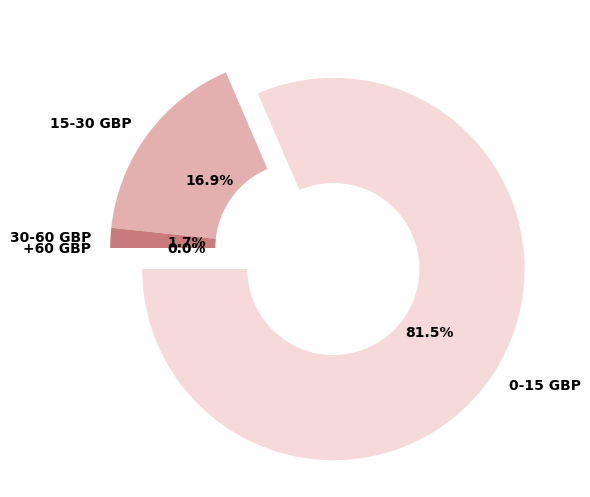

In [213]:
# Porcentaje por intervalo para clase 2
Fdist_2 = ((df[df['Pclass'] == 2].value_counts('FareRange'))/total2*100).sort_index()
plt.figure(figsize=(6, 6))
plt.pie(Fdist_2, labels=Fdist_2.index, autopct='%1.1f%%', startangle=180, colors= ['#F6DADA', '#E4AFAF', '#C97A7A', '#A05252'],
        wedgeprops={'width': 0.55}, explode = [0.2, 0, 0, 0], textprops={'weight': 'bold'})
plt.tight_layout()
plt.savefig(os.getcwd() + '/Recursos_visuales/Graficas/Distribucion_Precios_2Clase.png', transparent=True, dpi=600)
plt.show()

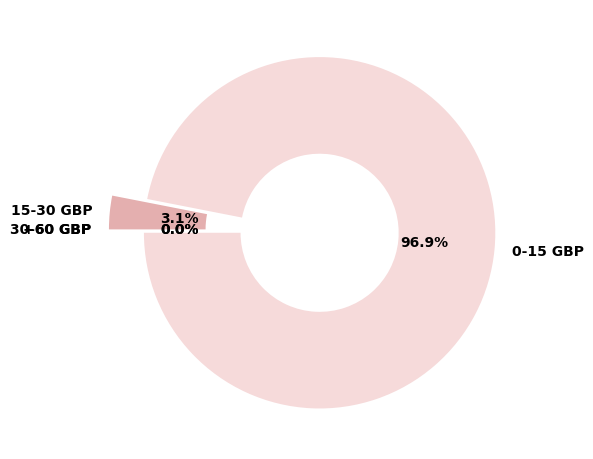

In [214]:
# Porcentaje por intervalo para clase 3
Fdist_3 = ((df[df['Pclass'] == 3].value_counts('FareRange'))/total3*100).sort_index()
plt.figure(figsize=(6, 6))
plt.pie(Fdist_3, labels=Fdist_3.index, autopct='%1.1f%%', startangle=180, colors= ['#F6DADA', '#E4AFAF', '#C97A7A', '#A05252'],
        wedgeprops={'width': 0.55}, explode = [0.2, 0, 0, 0], textprops={'weight': 'bold'})
plt.tight_layout()
plt.savefig(os.getcwd() + '/Recursos_visuales/Graficas/Distribucion_Precios_3Clase.png', transparent=True, dpi=600)
plt.show()

In [215]:
# Solo para hacer una grafica igual a la anterior voy a ajustar a la inflación los valores de los intervalos para que sea más visual
bins= [0,15,30,60,550]
nbins = []
for b in bins:
    nbins.append(round(fare_current(b, curr=i23, old=i12)))
    
nbins

[0, 2231, 4463, 8925, 81817]

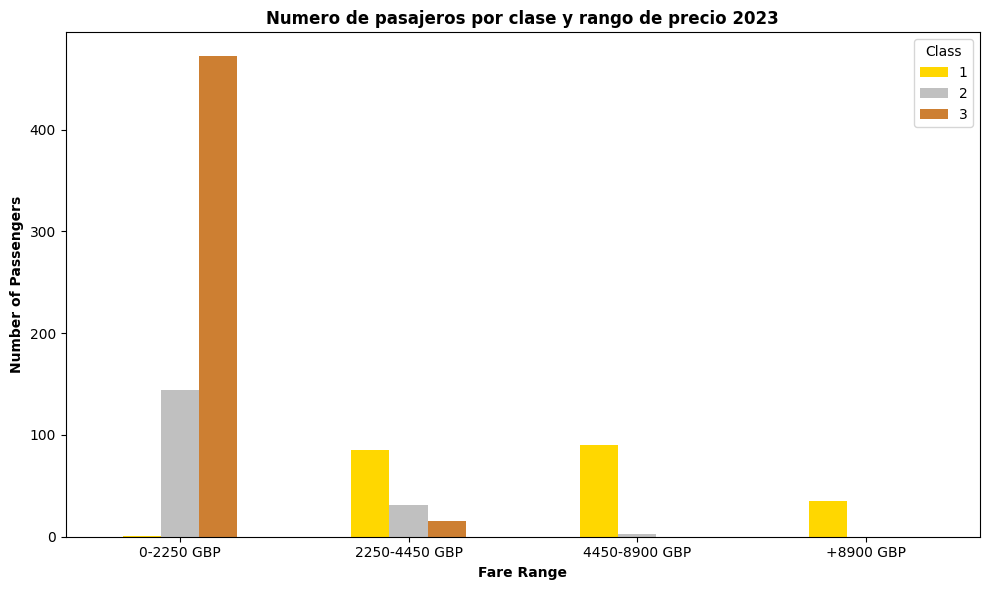

In [216]:
curr_range = pd.cut(df['CurrentFare'], bins= nbins, labels=['0-2250 GBP', '2250-4450 GBP', '4450-8900 GBP', '+8900 GBP'])
group = df.groupby([curr_range, 'Pclass']).size().unstack(fill_value=0)
group.plot(kind='bar', figsize=(10,6), color=['#FFD700', '#C0C0C0', '#CD7F32'])

plt.title('Numero de pasajeros por clase y rango de precio 2023', fontweight='bold')
plt.xlabel('Fare Range', fontweight='bold')
plt.ylabel('Number of Passengers', fontweight='bold')
plt.xticks(rotation=0)

plt.legend(title='Class')
plt.tight_layout()

plt.savefig(os.getcwd() + '/Recursos_visuales/Graficas/Fare_Class_New.png', transparent=True, dpi=600)

plt.show()

#### Tasa de supervivencia por rango

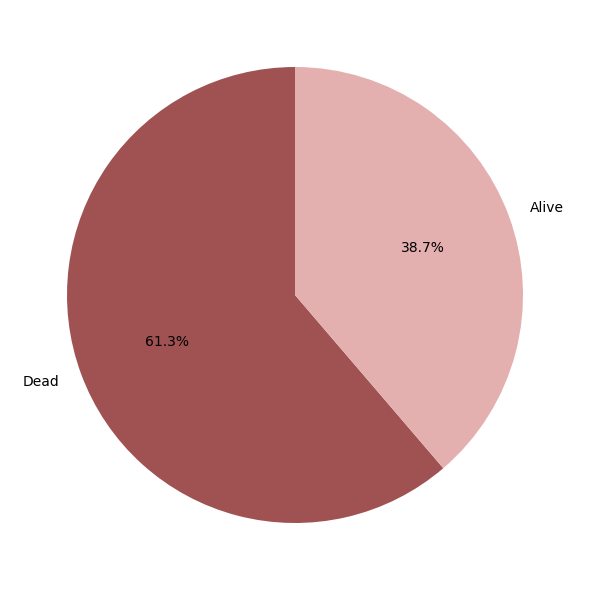

In [231]:
survival = df.value_counts('Survived')
plt.figure(figsize=(6, 6))
plt.pie(survival, labels=['Dead', 'Alive' ], autopct='%1.1f%%', colors=['#A05252', '#E4AFAF'], startangle=90)
plt.tight_layout()

plt.savefig(os.getcwd() + '/Recursos_visuales/Graficas/Survival.png', transparent=True, dpi=600)

plt.show()

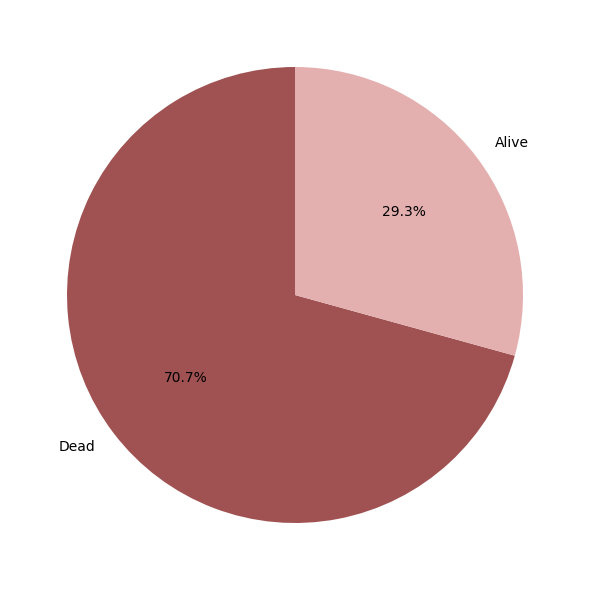

In [230]:
low_survival = df[df['FareRange']== '0-15 GBP'].value_counts('Survived')
plt.figure(figsize=(6, 6))
plt.pie(low_survival, labels=['Dead', 'Alive' ], autopct='%1.1f%%', colors=['#A05252', '#E4AFAF'], startangle=90)
plt.tight_layout()

plt.savefig(os.getcwd() + '/Recursos_visuales/Graficas/Survival_low.png', transparent=True, dpi=600)

plt.show()

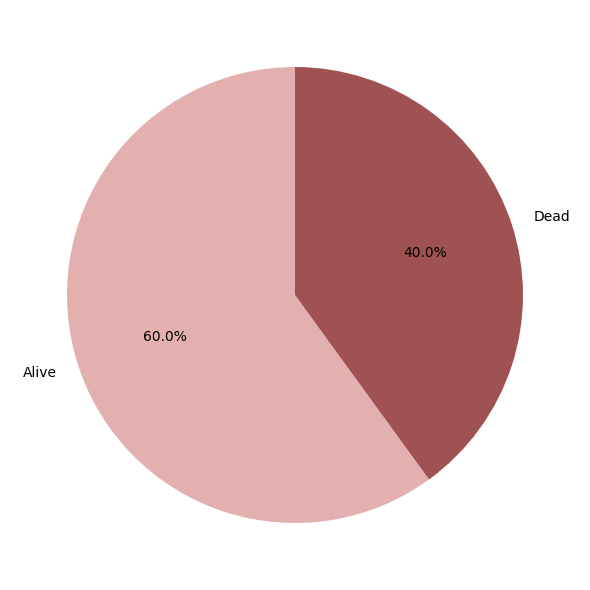

In [229]:
mid_survival = df[df['FareRange']== '15-30 GBP'].value_counts('Survived')

plt.figure(figsize=(6, 6))
plt.pie(mid_survival, labels=['Alive', 'Dead'], autopct='%1.1f%%', colors=['#E4AFAF', '#A05252'], startangle=90)
plt.tight_layout()

plt.savefig(os.getcwd() + '/Recursos_visuales/Graficas/Survival_mid.png', transparent=True, dpi=600)


plt.show()

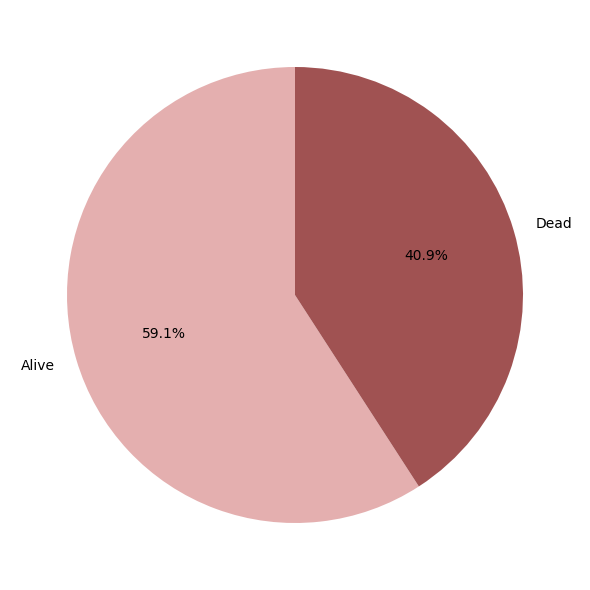

In [232]:
sup_survival = df[df['FareRange']== '30-60 GBP'].value_counts('Survived')

plt.figure(figsize=(6, 6))
plt.pie(sup_survival, labels=['Alive', 'Dead'], autopct='%1.1f%%', colors=['#E4AFAF', '#A05252'], startangle=90)
plt.tight_layout()

plt.savefig(os.getcwd() + '/Recursos_visuales/Graficas/Survival_high.png', transparent=True, dpi=600)

plt.show()

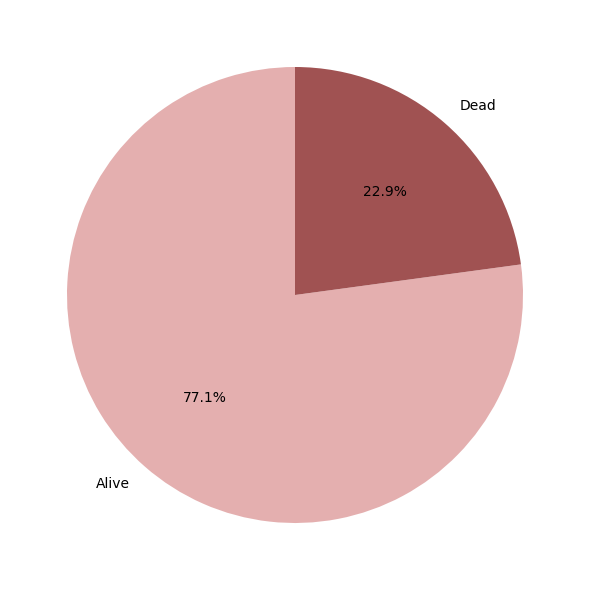

In [228]:
most_survival = df[df['FareRange']== '+60 GBP'].value_counts('Survived')

plt.figure(figsize=(6, 6))
plt.pie(most_survival, labels=['Alive', 'Dead'], autopct='%1.1f%%', colors=['#E4AFAF', '#A05252'], startangle=90)
plt.tight_layout()

plt.savefig(os.getcwd() + '/Recursos_visuales/Graficas/Survival_most.png', transparent=True, dpi=600)

plt.show()

### Cosas que probé pero no acabé utilizando para la presentación:

#### Deleted:
Borrado del apartado Correccion de la columna `Cabin`:
Tras revisarlo de nuevo y haber llegado tarde a la conclusión de que los precios no venían divididos por persona sino por habitación creo que esto no tiene tanto sentido como pensaba ya que tampoco tenemos el DataSet entero y puede ser que la asignacion de estas personas este con su acompañantes o que se haya perdido tod la información.

In [ ]:
# Personas sin cabina en 2 clase 
df[(df['Fare']<25) & (df['Pclass']==2)].shape[0]


116

In [ ]:
# Personas sin cabina  en 3 clase 
df[(df['Fare']<25) & (df['Pclass']==3)].shape[0]

435

In [ ]:
# Las reemplazo por 'Unassigned'
df.loc[(df['Fare']<25) & (df['Pclass'] == 3), 'Cabin'] = 'Unassigned'
df.loc[(df['Fare']<25) & (df['Pclass'] == 2), 'Cabin'] = 'Unassigned'

In [ ]:
# Este es el numero real de valores nulos en Cabin
df.loc[df['Cabin'].isnull()].shape[0]

159

#### Identify family:
Ahora creo un nuevo DataFrame con unicamente las familias para ver por clase los precios pagados

In [147]:
# Para esto era la columna LastName
df_related = df[(df['SibSp'] != 0) & (df['Parch'] != 0)].copy()
df_famcount = df_related.groupby('LastName').agg({
    'PassengerId': 'size',
    'Survived': 'sum',
    'Pclass': lambda x: x.mode()[0],
    'Fare': 'sum',
    'CurrentFare': 'sum',
    'Ticket': lambda x: x.unique(),
    'Cabin': lambda x: x.unique(),
    'Embarked': lambda x: x.unique(),
}).rename(columns={
    'PassengerId': 'FCount',
    'Fare': 'TotalFare',
    'Pclass': 'FClass',
    'CurrentFare': 'TotalCurrent'
})


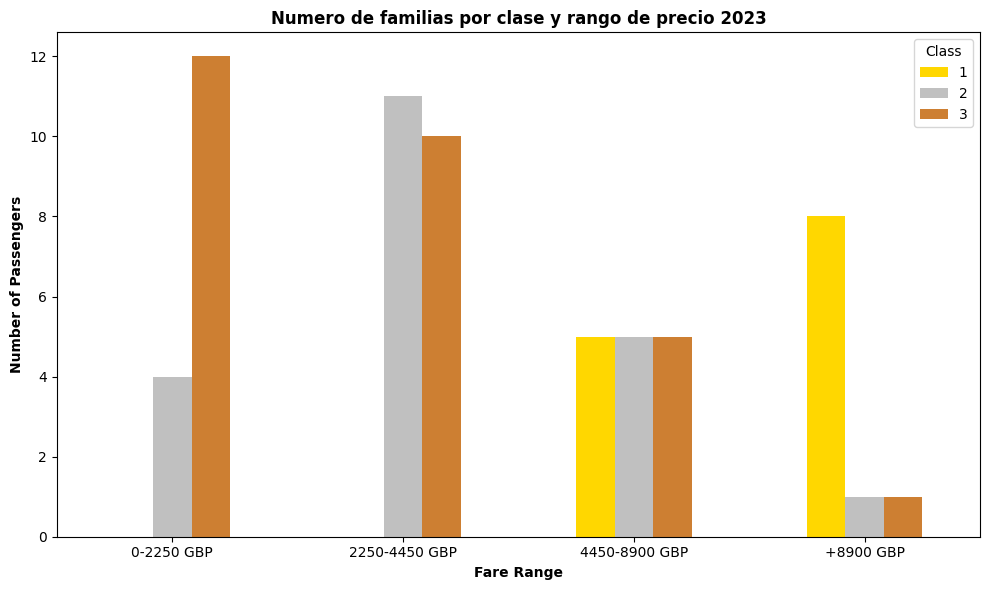

In [149]:
# Y una grafica similar al resto par comprarar por clase de familia, cuanto dinero se han gastado
fam_range = pd.cut(df_famcount['TotalCurrent'], bins= nbins, labels=['0-2250 GBP', '2250-4450 GBP', '4450-8900 GBP', '+8900 GBP'])
group = df_famcount.groupby([fam_range, 'FClass']).size().unstack(fill_value=0)
group.plot(kind='bar', figsize=(10,6), color=['#FFD700', '#C0C0C0', '#CD7F32'])

plt.title('Numero de familias por clase y rango de precio 2023', fontweight='bold')
plt.xlabel('Fare Range', fontweight='bold')
plt.ylabel('Number of Passengers', fontweight='bold')
plt.xticks(rotation=0)

plt.legend(title='Class')
plt.tight_layout()

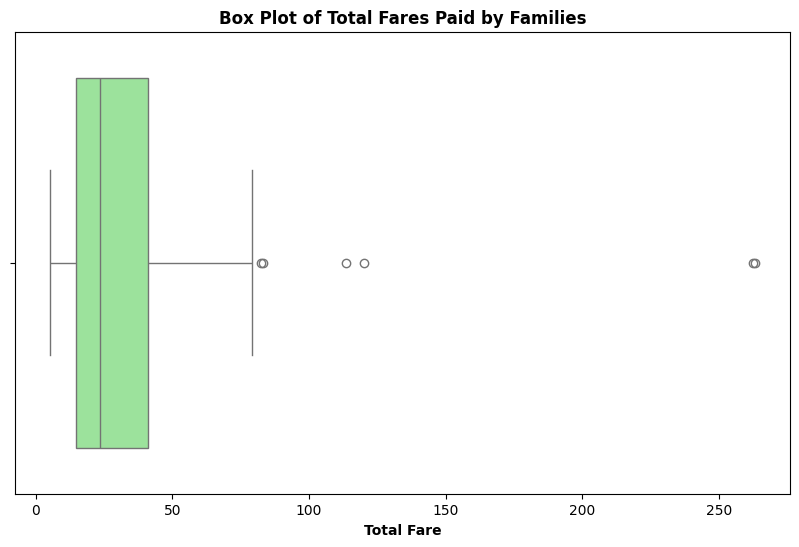

In [139]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_famcount['TotalFare'], color='lightgreen')

plt.title('Box Plot of Total Fares Paid by Families', fontweight='bold')
plt.xlabel('Total Fare', fontweight='bold')

plt.show()



#### Columna `AgeRange`:
Decido crear una columna que agrupe a las personas en 5 rangos de edad para poder sacar conclusiones basadas en él facilmente

In [391]:
min_age, max_age = df['Age'].min(), df['Age'].max()
min_age, max_age 

(0, 80)

In [392]:
# Demarco intervalos de 16 años
boxes = 5
bins = np.linspace(min_age, max_age, boxes+1)
# Añado columna AgeRange al Dataset
df['AgeRange'] = np.digitize(df['Age'], bins)

In [393]:
# Para hacerme la vida mas facil en el futuro asigno unos valores mas descriptivos a la nueva columna (si hubiese utilizado cut habria sido más facil)
def age_range(row):
    if pd.isna(row):
        pass
    elif row == 1:
        return '1.Child'
    elif row == 2:
        return '2.Young Adult'
    elif row == 3:
        return '3.Adult'
    elif row == 4:
        return '4.Advanced Age'
    else:
        return '5.Elderly'
        

In [394]:
df['AgeRange'] = df['AgeRange'].apply(age_range)

In [395]:
df.value_counts('AgeRange').sort_index()

AgeRange
1.Child            83
2.Young Adult     522
3.Adult           197
4.Advanced Age     76
5.Elderly          13
Name: count, dtype: int64

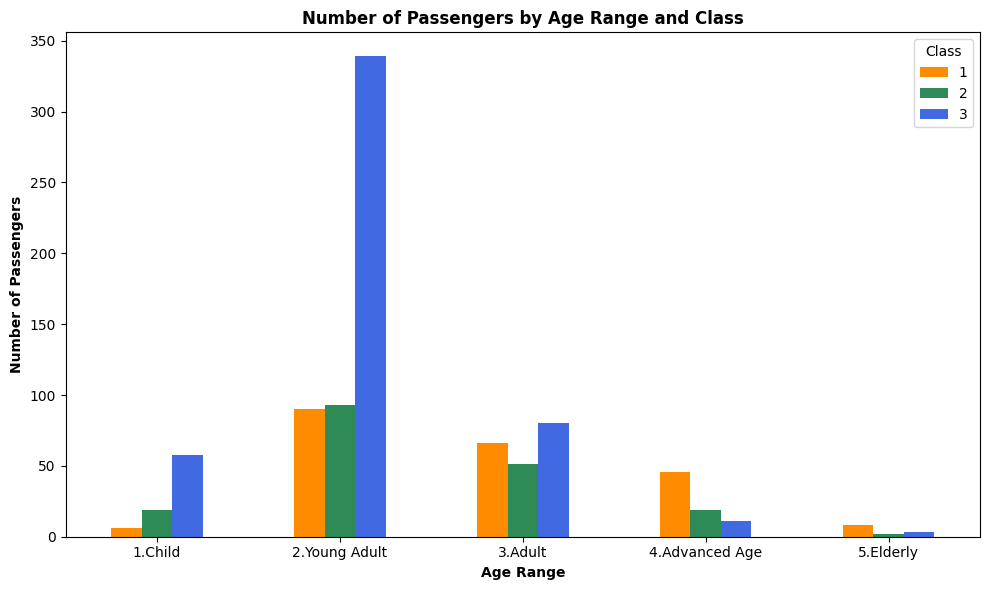

In [396]:
group = df.groupby(['AgeRange', 'Pclass']).size().unstack(fill_value=0)

group.plot(kind='bar', figsize=(10,6), color=['darkorange', 'seagreen', 'royalblue' ])

plt.title('Number of Passengers by Age Range and Class', fontweight='bold')
plt.xlabel('Age Range', fontweight='bold')
plt.ylabel('Number of Passengers', fontweight='bold')
plt.xticks(rotation=0)

plt.legend(title='Class')
plt.tight_layout()

plt.show()